## 数据预处理

In [ ]:
import tensorflow as tf
import numpy as np
# 加载minst数据集
(x_train, y_train), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()
# 扩充通道维度,使二维图片变为通道数为3的3D张量 
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(test_images, axis=-1)
x_train = np.repeat(x_train, 3, axis=-1)
x_test = np.repeat(x_test, 3, axis=-1)
# 图像标准化处理 
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255
# 根据网络，改变输入图像尺寸，
x_train = tf.image.resize(x_train, [71,71]) 
x_test = tf.image.resize(x_test, [71,71])
# one-hot 编码 
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(test_labels)
# 查看尺寸
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

11501568/11490434 [==============================] - 0s 0us/step
(60000, 71, 71, 3) (60000, 10)
(10000, 71, 71, 3) (10000, 10)


In [ ]:
#x_val=tf.concat([x_train[56000:60000],x_test[:3000]],axis=0)
#y_val=tf.concat([y_train[56000:60000],y_test[:3000]],axis=0)

#x_train=x_train[:56000]
#y_train=y_train[:56000]
#x_test=x_test[3000:10000]
#y_test=y_test[3000:10000]
print(x_train.shape, y_train.shape)
#print(x_val.shape, y_val.shape)
print(x_test.shape, y_test.shape)

(60000, 71, 71, 3) (60000, 10)
(10000, 71, 71, 3) (10000, 10)


array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

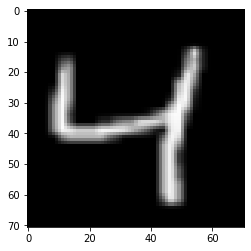

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[2])
y_train[2]

## 方法一：自己从0开始训练Xception网络

In [ ]:
#应用Xception模型
base_model = tf.keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(71, 71, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.
#冻结模型
base_model.trainable = True
inputs = tf.keras.Input(shape=(71, 71, 3))
x = base_model(inputs, training=True)
#添加新的分类器
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x= tf.keras.layers.Dense(100,activation='relu')(x)
x= tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10,activation='softmax')(x)
model = tf.keras.Model(inputs, outputs)
model.summary()

83697664/83683744 [==============================] - 3s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 71, 71, 3)]       0         
                                                                 
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 100)               204900    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010   

In [ ]:
#编译、训练模型，记录中间批次在验证集、训练集的准确率与损失
model.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'],optimizer=tf.keras.optimizers.Adam())
history = model.fit(x_train,y_train,batch_size=128,epochs=9, validation_split=0.1)

Epoch 1/9
422/422 [==============================] - 274s 609ms/step - loss: 0.1202 - accuracy: 0.9682 - val_loss: 0.0405 - val_accuracy: 0.9915
Epoch 2/9
422/422 [==============================] - 255s 604ms/step - loss: 0.0386 - accuracy: 0.9894 - val_loss: 0.0264 - val_accuracy: 0.9933
Epoch 3/9
422/422 [==============================] - 255s 604ms/step - loss: 0.0293 - accuracy: 0.9927 - val_loss: 0.0259 - val_accuracy: 0.9935
Epoch 4/9
422/422 [==============================] - 255s 604ms/step - loss: 0.0224 - accuracy: 0.9942 - val_loss: 0.0399 - val_accuracy: 0.9903
Epoch 5/9
422/422 [==============================] - 255s 604ms/step - loss: 0.0217 - accuracy: 0.9944 - val_loss: 0.0330 - val_accuracy: 0.9933
Epoch 6/9
422/422 [==============================] - 254s 603ms/step - loss: 0.0187 - accuracy: 0.9948 - val_loss: 0.0268 - val_accuracy: 0.9952
Epoch 7/9
422/422 [==============================] - 255s 604ms/step - loss: 0.0163 - accuracy: 0.9960 - val_loss: 0.0288 - val_ac

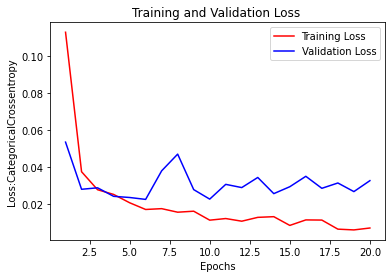

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
train_loss=history.history['loss']
val_loss=history.history['val_loss']
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
epochs=range(1,len(train_loss)+1)

plt.plot(epochs,train_loss,'b',color="red",label="Training Loss")
plt.plot(epochs,val_loss,'b',label="Validation Loss")
plt.title("Training and Validation Loss ")
plt.ylabel("Loss:CategoricalCrossentropy")
plt.xlabel("Epochs")
plt.legend(loc='best')

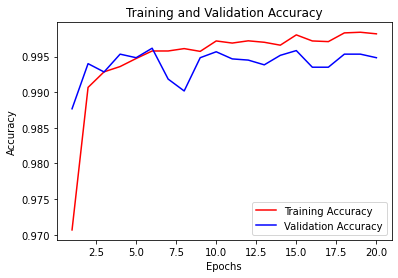

In [ ]:
plt.clf()
plt.plot(epochs,train_acc,'b',color="red",label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(loc='best')
plt.show()

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 17s 52ms/step - loss: 0.0657 - accuracy: 0.9905


[0.06574235111474991, 0.9904999732971191]

## 方法二：预训练网络特征选取

In [ ]:
#应用Xception模型
base_model = tf.keras.applications.Xception(
    weights='imagenet',  # 加载在ImageNet训练好的网络参数
    input_shape=(71, 71, 3),
    include_top=False)  # 去除顶部分类器

#通过training=False，冻结Xception模型
base_model.trainable = False
inputs = tf.keras.Input(shape=(71, 71, 3))
x = base_model(inputs, training=False)

#重新设计xception顶部分类器
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x= tf.keras.layers.Dense(100,activation='relu')(x)
x= tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10,activation='softmax')(x)
model_f = tf.keras.Model(inputs, outputs)
model_f.summary()

83697664/83683744 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 71, 71, 3)]       0         
                                                                 
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 global_average_pooling2d (G  (None, 2048)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense (Dense)               (None, 100)               204900    
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1010   

In [ ]:
#采取RMSprop,学习率更小，编译并拟合模型
model_f.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'],
              optimizer=tf.keras.optimizers.RMSprop())
history_f = model_f.fit(x_train,y_train,batch_size=128,
                        epochs=13,
                        validation_split=0.1)

Epoch 1/13
422/422 [==============================] - 91s 188ms/step - loss: 0.4885 - accuracy: 0.8499 - val_loss: 0.2072 - val_accuracy: 0.9350
Epoch 2/13
422/422 [==============================] - 76s 181ms/step - loss: 0.2269 - accuracy: 0.9293 - val_loss: 0.1509 - val_accuracy: 0.9522
Epoch 3/13
422/422 [==============================] - 77s 181ms/step - loss: 0.1814 - accuracy: 0.9421 - val_loss: 0.1234 - val_accuracy: 0.9613
Epoch 4/13
422/422 [==============================] - 76s 181ms/step - loss: 0.1567 - accuracy: 0.9495 - val_loss: 0.1318 - val_accuracy: 0.9580
Epoch 5/13
422/422 [==============================] - 76s 181ms/step - loss: 0.1389 - accuracy: 0.9555 - val_loss: 0.1157 - val_accuracy: 0.9625
Epoch 6/13
422/422 [==============================] - 76s 181ms/step - loss: 0.1280 - accuracy: 0.9589 - val_loss: 0.0975 - val_accuracy: 0.9690
Epoch 7/13
422/422 [==============================] - 76s 181ms/step - loss: 0.1180 - accuracy: 0.9628 - val_loss: 0.1830 - val_ac

In [ ]:
model_f.evaluate(x_test, y_test)

313/313 [==============================] - 16s 49ms/step - loss: 0.1182 - accuracy: 0.9648


[0.11817501485347748, 0.9648000001907349]

In [ ]:
model_f.evaluate(x_test, y_test)

313/313 [==============================] - 15s 48ms/step - loss: 0.1188 - accuracy: 0.9704


[0.11875299364328384, 0.9703999757766724]

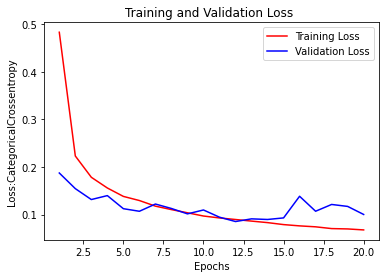

In [ ]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
train_loss_f=history_f.history['loss']
val_loss_f=history_f.history['val_loss']
train_acc_f=history_f.history['accuracy']
val_acc_f=history_f.history['val_accuracy']
epochs=range(1,len(train_loss_f)+1)

plt.plot(epochs,train_loss_f,'b',color='red',label="Training Loss")
plt.plot(epochs,val_loss_f,'b',label="Validation Loss")
plt.title("Training and Validation Loss ")
plt.ylabel("Loss:CategoricalCrossentropy")
plt.xlabel("Epochs")
plt.legend(loc='best')

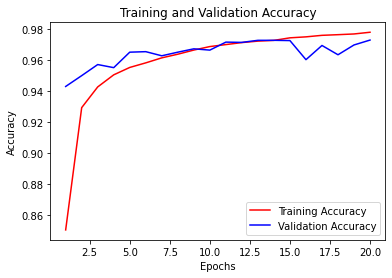

In [ ]:
plt.clf()
plt.plot(epochs,train_acc_f,'b',color='red',label="Training Accuracy")
plt.plot(epochs,val_acc_f,'b',label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(loc='best')
plt.show()

## 方法三：预训练冻结部分网络，进行微调

In [ ]:
#应用Xception模型
base_model = tf.keras.applications.Xception(
    weights='imagenet',  # Load weights pre-trained on ImageNet.
    input_shape=(71, 71, 3),
    include_top=False)  # Do not include the ImageNet classifier at the top.

#冻结模型
#for i,layer in enumerate(base_model.layers):
  #print(i, layer.name)
for layer in base_model.layers[:125]:
  layer.trainable = False
#base_model.summary()

83697664/83683744 [==============================] - 4s 0us/step


In [ ]:
inputs = tf.keras.Input(shape=(71, 71, 3))
#通过training=False确保基础模型在推断模式下运行。否则就失去了迁移学习和微调的意义
x = base_model(inputs)
#添加的你的新模型
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x= tf.keras.layers.Dense(100,activation='relu')(x)
x= tf.keras.layers.Dropout(0.2)(x)
outputs = tf.keras.layers.Dense(10,activation='softmax')(x)
model_tune = tf.keras.Model(inputs, outputs)
model_tune.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 71, 71, 3)]       0         
                                                                 
 xception (Functional)       (None, 3, 3, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_2 (Dense)             (None, 100)               204900    
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_3 (Dense)             (None, 10)                1010      
                                                           

In [ ]:
#编译并拟合模型
model_tune.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'],
              optimizer=tf.keras.optimizers.RMSprop())
history_t = model_tune.fit(x_train,y_train,batch_size=128,
          epochs=20,
          validation_split=0.1)

Epoch 1/20
422/422 [==============================] - 102s 212ms/step - loss: 0.1633 - accuracy: 0.9519 - val_loss: 0.5131 - val_accuracy: 0.8938
Epoch 2/20
422/422 [==============================] - 87s 206ms/step - loss: 0.0723 - accuracy: 0.9785 - val_loss: 0.1143 - val_accuracy: 0.9745
Epoch 3/20
422/422 [==============================] - 87s 205ms/step - loss: 0.0572 - accuracy: 0.9841 - val_loss: 0.1390 - val_accuracy: 0.9688
Epoch 4/20
422/422 [==============================] - 87s 206ms/step - loss: 0.0450 - accuracy: 0.9865 - val_loss: 0.0656 - val_accuracy: 0.9850
Epoch 5/20
422/422 [==============================] - 87s 206ms/step - loss: 0.0376 - accuracy: 0.9893 - val_loss: 0.0635 - val_accuracy: 0.9875
Epoch 6/20
422/422 [==============================] - 87s 206ms/step - loss: 0.0337 - accuracy: 0.9908 - val_loss: 0.0666 - val_accuracy: 0.9852
Epoch 7/20
422/422 [==============================] - 87s 206ms/step - loss: 0.0303 - accuracy: 0.9915 - val_loss: 0.0632 - val_a

In [ ]:
#编译并拟合模型
model_tune.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
              metrics=['accuracy'],
              optimizer=tf.keras.optimizers.RMSprop())
history_t = model_tune.fit(x_train,y_train,batch_size=128,
          epochs=9,
          validation_split=0.1)

Epoch 1/9
422/422 [==============================] - 96s 198ms/step - loss: 0.1663 - accuracy: 0.9501 - val_loss: 0.1178 - val_accuracy: 0.9658
Epoch 2/9
422/422 [==============================] - 82s 193ms/step - loss: 0.0746 - accuracy: 0.9784 - val_loss: 0.0746 - val_accuracy: 0.9808
Epoch 3/9
422/422 [==============================] - 82s 194ms/step - loss: 0.0587 - accuracy: 0.9839 - val_loss: 0.1045 - val_accuracy: 0.9742
Epoch 4/9
422/422 [==============================] - 82s 193ms/step - loss: 0.0484 - accuracy: 0.9868 - val_loss: 0.0653 - val_accuracy: 0.9825
Epoch 5/9
422/422 [==============================] - 82s 194ms/step - loss: 0.0385 - accuracy: 0.9888 - val_loss: 0.1266 - val_accuracy: 0.9768
Epoch 6/9
422/422 [==============================] - 85s 201ms/step - loss: 0.0337 - accuracy: 0.9905 - val_loss: 0.0679 - val_accuracy: 0.9853
Epoch 7/9
422/422 [==============================] - 82s 194ms/step - loss: 0.0314 - accuracy: 0.9912 - val_loss: 0.0537 - val_accuracy:

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


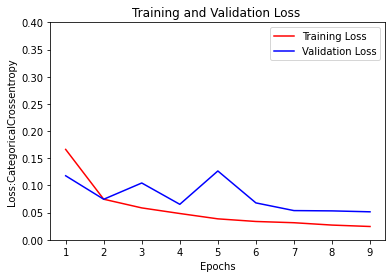

In [ ]:
train_loss_t=history_t.history['loss']
val_loss_t=history_t.history['val_loss']
train_acc_t=history_t.history['accuracy']
val_acc_t=history_t.history['val_accuracy']
epochs=range(1,len(train_loss_t)+1)

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False
plt.plot(epochs,train_loss_t,'b',color='red',label="Training Loss")
plt.plot(epochs,val_loss_t,'b',label="Validation Loss")
plt.ylim(0,0.4)
plt.title("Training and Validation Loss ")
plt.ylabel("Loss:CategoricalCrossentropy")
plt.xlabel("Epochs")
plt.legend(loc='best')

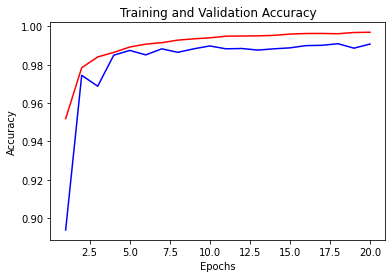

In [ ]:
plt.clf()
plt.plot(epochs,train_acc_t,'b',color='red',label="Training Accuracy")
plt.plot(epochs,val_acc_t,'b',label="Validation Accuracy")
plt.title("Training and Validation Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.show()

In [ ]:
model_tune.evaluate(x_test, y_test)

313/313 [==============================] - 15s 46ms/step - loss: 0.0686 - accuracy: 0.9887


[0.06863047182559967, 0.9886999726295471]